In [1]:
import os
import fiona
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as geopd

/home/claudinei/.local/lib/python3.6/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


## Data Informations
All data shared from 
[CapitalBikeShare](https://www.capitalbikeshare.com/system-data)

## Tasks to make
- Get a total of members and casual clients
- Explore how many clients use in normal work/study hour 6~9 12~14 18~20
- Get the most stations used
- Get the most bikes used by the time used


In [2]:
dataframe_stations = pd.read_json('https://gbfs.capitalbikeshare.com/gbfs/en/station_information.json', orient='values')
dataframe_stations = pd.DataFrame(dataframe_stations.data.stations).set_index('station_id')
print('Length: ',len(dataframe_stations))
#dataframe_stations.head()

Length:  645


In [3]:
dataframe_tripdata_raw = pd.read_csv('2016Q1-capitalbikeshare-tripdata.csv')
print('Length: ',len(dataframe_tripdata_raw))
#dataframe_tripdata_raw.head()

Length:  552399


In [17]:
dataframe_tripdata = dataframe_tripdata_raw.copy()
print('Length: ',len(dataframe_tripdata))
#dataframe_tripdata.head()

Length:  552399


In [5]:
dataframe_membertype = dataframe_tripdata.groupby('Member type')['Duration'].count().reset_index()
dataframe_membertype.rename(columns={'Duration':'Total'}, inplace=True)
#dataframe_membertype.head()

### Total of clients by the type

| Member Type	| Total |
|----|----|
| Casual	| 84967 |
| Member	| 467432 |

In [6]:
dataframe_casualclients = dataframe_tripdata[dataframe_tripdata['Member type'] == 'Casual']
print('Length: ',len(dataframe_casualclients))
#dataframe_casualclients.head()

Length:  84967


In [7]:
dataframe_memberclients = dataframe_tripdata[dataframe_tripdata['Member type'] == 'Member']
print('Length: ',len(dataframe_memberclients))
#dataframe_memberclients.head()

Length:  467432


In [8]:
dataframe_casual_by_station = dataframe_casualclients.groupby('Start station number')['Member type'].count().reset_index()
dataframe_casual_by_station.rename(columns={'Start station number':'station_id','Member type':'total'}, inplace=True)
print('Length: ',len(dataframe_casual_by_station))
#dataframe_casual_by_station.head()

Length:  355


In [9]:
dataframe_member_by_station = dataframe_memberclients.groupby('Start station number')['Member type'].count().reset_index()
dataframe_member_by_station.rename(columns={'Start station number':'station_id','Member type':'total'}, inplace=True)
print('Length: ',len(dataframe_member_by_station))
#dataframe_member_by_station.head()

Length:  370


## Morning Clients
6am ~ 9am

In [97]:
dataframe_morning_clients = dataframe_tripdata.copy()
dataframe_morning_clients['Start date'] = pd.to_datetime(dataframe_morning_clients['Start date'])
dataframe_morning_clients.set_index('Start date',inplace=True)
dataframe_morning_clients = dataframe_morning_clients.between_time('06:00:00','09:00:00')
print('Total Morning Clients: ',len(dataframe_morning_clients))
# dataframe_morning_clients.head()

Total Morning Clients:  95095


## Lunch Clients 
12am ~ 14pm

In [98]:
dataframe_lunch_clients = dataframe_tripdata.copy()
dataframe_lunch_clients['Start date'] = pd.to_datetime(dataframe_lunch_clients['Start date'])
dataframe_lunch_clients.set_index('Start date',inplace=True)
dataframe_lunch_clients = dataframe_lunch_clients.between_time('12:00:00','14:00:00')
print('Total LunchTime Clients: ',len(dataframe_lunch_clients))
# dataframe_lunch_clients.head()

Total LunchTime Clients:  61398


## Go Home Clients
18pm ~ 19pm

In [101]:
dataframe_night_clients = dataframe_tripdata.copy()
dataframe_night_clients['Start date'] = pd.to_datetime(dataframe_night_clients['Start date'])
dataframe_night_clients.set_index('Start date',inplace=True)
dataframe_night_clients = dataframe_night_clients.between_time('18:00:00','20:00:00')
print('Total Night Clients: ',len(dataframe_night_clients))
# dataframe_night_clients.head()

Total Night Clients:  85083


## Import maps with GeoPandas
Search for Virginia USA

In [11]:
url = "https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_110m_admin_1_states_provinces_shp.geojson"
df = geopd.read_file(url)
map_virginia = df[df['diss_me'] == 3552]
map_virginia

,scalerank,adm1_code,diss_me,adm1_cod_1,iso_3166_2,wikipedia,sr_sov_a3,sr_adm0_a3,iso_a2,adm0_sr,...,area_sqkm,sameascity,labelrank,featurec_1,admin,name_len,mapcolor9,mapcolor13,featureclass,geometry
39,2,USA-3552,3552,USA-3552,US-VA,http://en.wikipedia.org/wiki/Virginia,US1,USA,US,6,...,0,-99,0,Admin-1 scale rank,United States of America,8,1,1,Admin-1 scale rank,"MULTIPOLYGON (((-75.37754 38.01538, -75.94003 ..."


<AxesSubplot:>

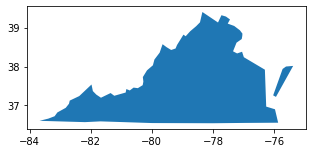

In [12]:
map_virginia.plot(figsize=(5, 5))